# Clasificador K-Means

## 1. Introducción al Clasificador K-Means

K-Means es una técnica de *clustering* no supervisado que permite agrupar datos similares en **k** grupos o clústeres. 
Cada grupo se caracteriza por un **centroide**, que es el promedio de los puntos asignados a ese clúster.

- No requiere etiquetas previas.
- Busca minimizar la **varianza intra-clúster**.
- Alterna entre:
  1. Asignar cada punto al centroide más cercano.
  2. Recalcular los centroides.


## 2. Formalización Matemática

Dado un conjunto de datos $\{x_1, x_2, ..., x_n\} \subset \mathbb{R}^d$ y un número de clústeres $k$, el objetivo de K-Means es minimizar la suma de errores cuadráticos dentro de cada clúster:

$$
J = \sum_{i=1}^k \sum_{x_j \in C_i} \| x_j - \mu_i \|^2
$$

Donde:
- $C_i$ es el conjunto de puntos asignados al clúster $i$.
- $\mu_i$ es el centroide de $C_i$, calculado como el promedio de sus puntos.


## 3. Generación del Dataset Artificial

In [7]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generar datos
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X, columns=["x", "y"])
df["cluster_real"] = y
df.head()

,x,y,cluster_real
0,0.428577,4.973997,0
1,1.619909,0.067645,1
2,1.432893,4.376792,0
3,-1.578462,3.034458,2
4,-1.658629,2.267460,2


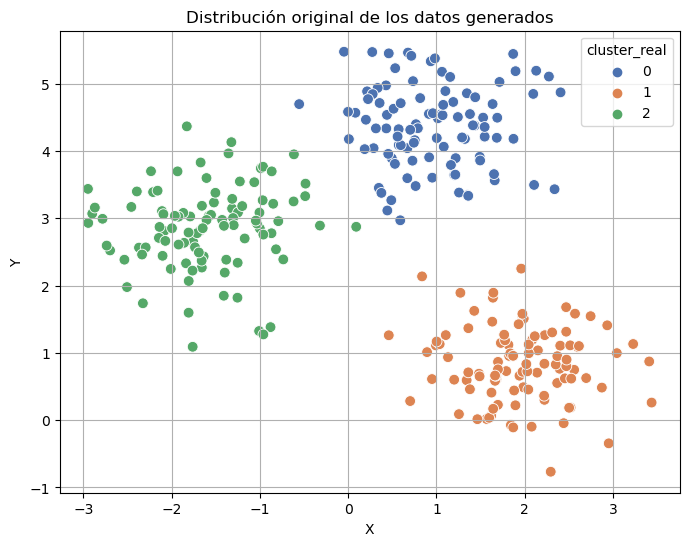

In [8]:
# Visualizar datos originales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="cluster_real", palette="deep", s=60)
plt.title("Distribución original de los datos generados")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

## 4. Implementación con scikit-learn

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


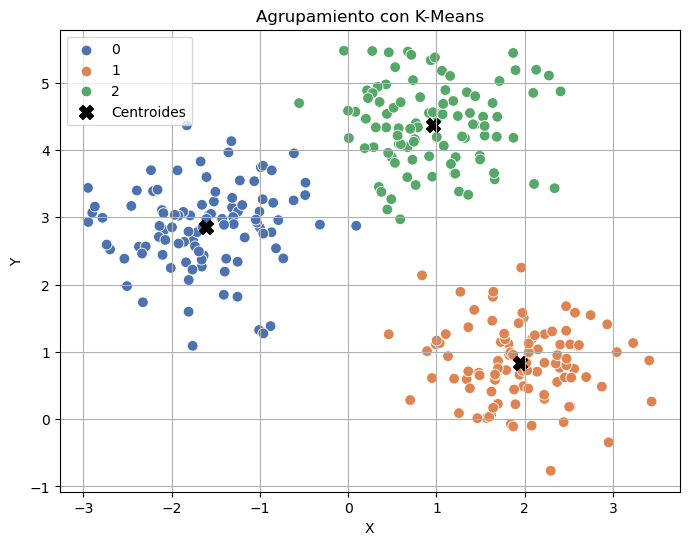

In [9]:
from sklearn.cluster import KMeans

# Aplicar k-means
kmeans = KMeans(n_clusters=3, random_state=0)
df["cluster_pred"] = kmeans.fit_predict(X)

# Visualizar clusters asignados
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="cluster_pred", palette="deep", s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=100, marker='X', label='Centroides')
plt.title("Agrupamiento con K-Means")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

## 5. Método del Codo para elegir k óptimo

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

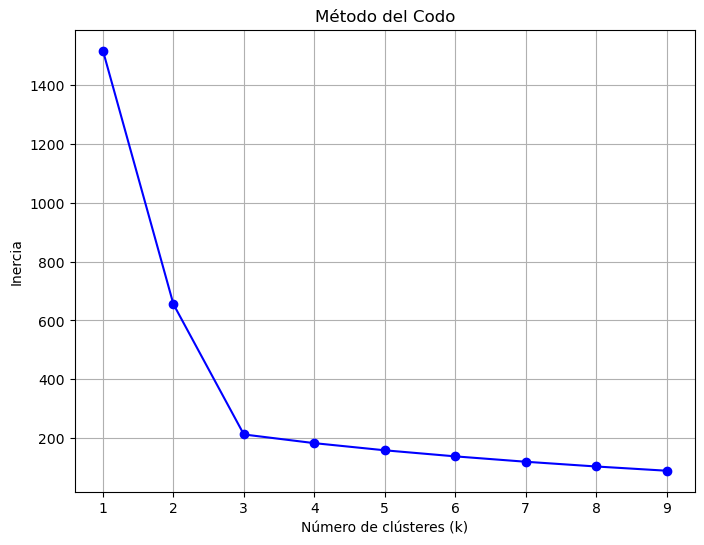

In [10]:
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, 'bo-')
plt.title("Método del Codo")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

## 6. Testing del modelo

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
inertias.append(kmeans.inertia_)

nuevos_datos = [[0, 3], [5, 2], [-2, 4]]

# Predecir a qué clúster pertenecen
predicciones = kmeans.predict(nuevos_datos)
print("Predicciones de clúster:", predicciones)


Predicciones de clúster: [0 1 0]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 7. Descripción de funciones y parámetros

- `KMeans(n_clusters, init, n_init, max_iter, random_state, ...)`:
  - `n_clusters`: Número de clústeres.
  - `init`: Método de inicialización de centroides (`'k-means++'` por defecto).
  - `n_init`: Número de veces que se reinicia el algoritmo para diferentes centroides iniciales.
  - `max_iter`: Número máximo de iteraciones por inicialización.
  - `random_state`: Semilla para reproducibilidad.

- `fit(X)`: Ajusta el modelo a los datos.
- `predict(X)`: Asigna cada muestra al clúster más cercano.
- `inertia_`: Suma de distancias cuadradas de las muestras a su centroide más cercano (valor de J).